In [1]:
import numpy as np
import os
from netCDF4 import Dataset

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('C:/Users/Adam.000/Dropbox/Code/DisCo/'))
sys.path.append(module_path)
from visuals import *

In [3]:
matplotlib.use("TkAgg")
%matplotlib inline

In [4]:
mpl.rcParams['axes.linewidth'] = 3.0

### IVT_alt-16: general "extreme weather" states

In [5]:
lcsdir = "D:/Adam/Extracted-Disco-Data/IVT_alt/result-16/fields/"
lcsfiles = sorted(os.listdir(lcsdir))

In [6]:
lcs_fields = []

for i,s in enumerate(lcsfiles):
    s_field = np.load(lcsdir+s)
    lcs_fields.append(s_field)
state_field = np.vstack(lcs_fields)

In [7]:
np.shape(state_field)

(500, 768, 1152)

In [8]:
state_field = np.roll(state_field,576, axis=2)
filteredIVT = np.copy(state_field)
filteredIVT[state_field==13] = 0

In [9]:
maskedIVT = np.ma.masked_array(filteredIVT, filteredIVT==0)

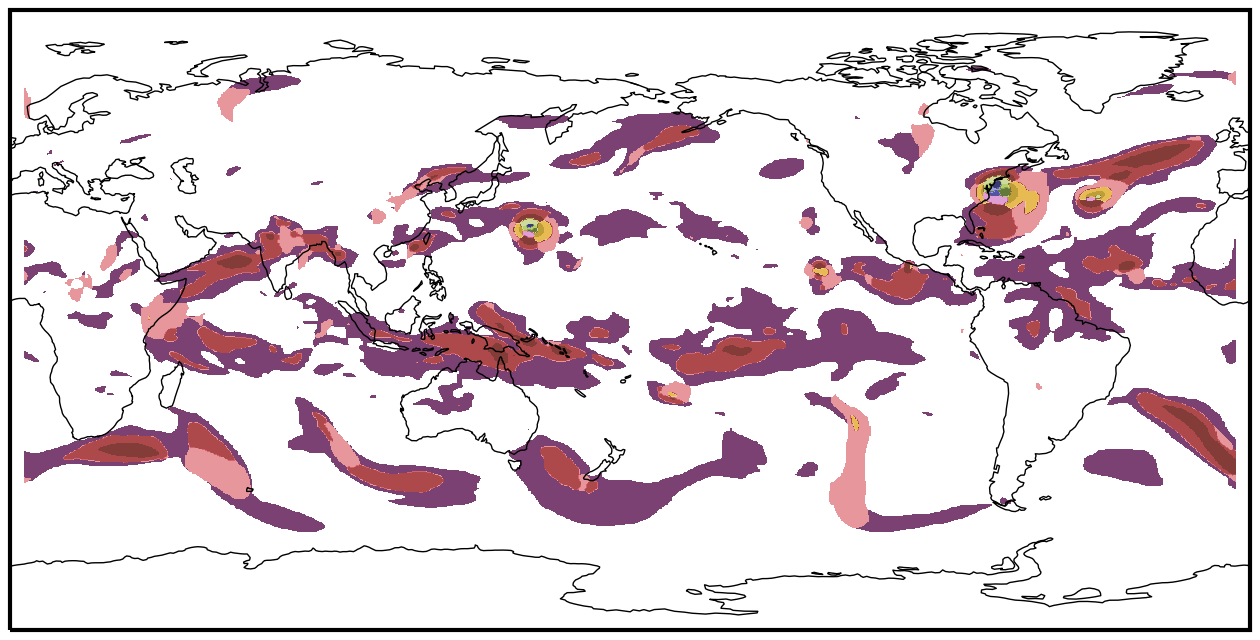

In [11]:
ind = 112

H,W = np.shape(maskedIVT[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(maskedIVT[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.tab20b, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_alt_states-16.svg', bbox_inches='tight')

## Hurricane mask

In [12]:
run_dir =  "D:/Adam/Extracted-Disco-Data/AR-Extracted-Data/netcdf_data/"
obs_fields = []
lcsdir =  "D:/Adam/Extracted-Disco-Data/IVT/result-8/fields/"
lcsfiles = sorted(os.listdir(lcsdir))

In [13]:
for (i,s) in enumerate(lcsfiles):
    index = i%8
    if index == 0:
        obs_name = s[4:-6]+'00000.nc'
        obs_name = obs_name[:43]+obs_name[44:46]+'2'+obs_name[47:]
        obs_load = Dataset(run_dir+obs_name, 'r')["TMQ"][:]
    obs_field = obs_load[index]
    obs_fields.append(obs_field)

In [14]:
field = np.stack(obs_fields)

In [15]:
np.shape(field)

(500, 768, 1152)

In [16]:
lcs_fields = []

for i,s in enumerate(lcsfiles):
    s_field = np.load(lcsdir+s)
    lcs_fields.append(s_field)
state_field = np.vstack(lcs_fields)

In [17]:
np.shape(state_field)

(500, 768, 1152)

In [18]:
field = np.roll(field,576, axis=2)
state_field = np.roll(state_field, 576, axis=2)
maskedIVT = np.roll(maskedIVT,576, axis=2)

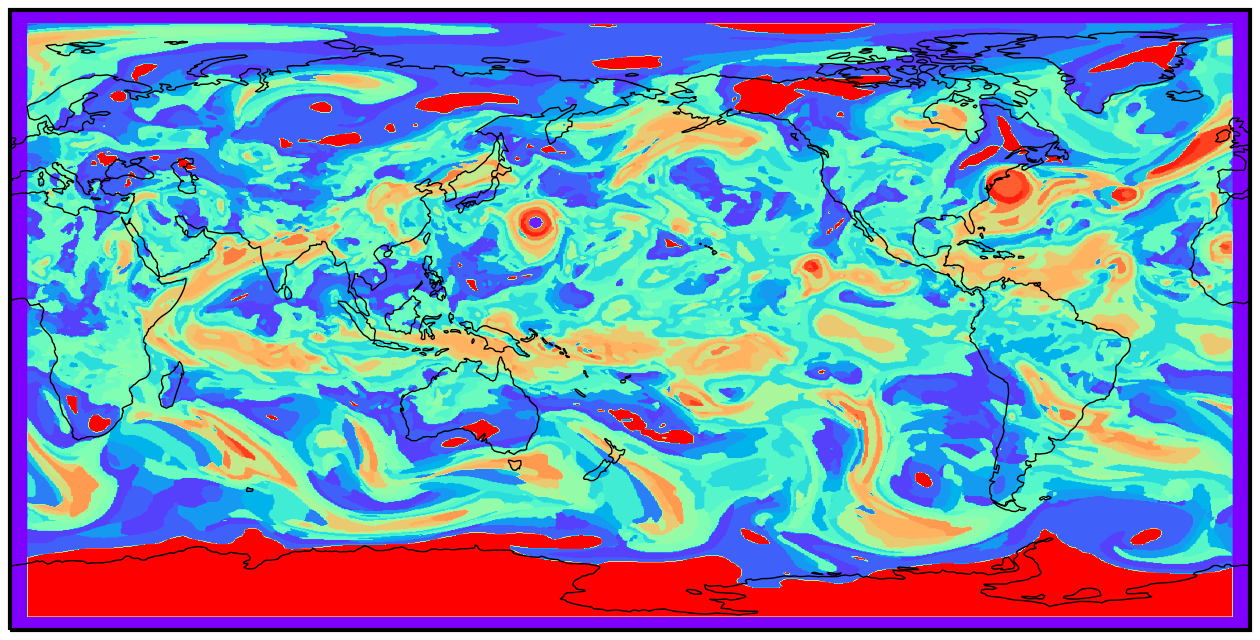

In [19]:
H,W = np.shape(field[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(state_field[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.rainbow, origin='lower')
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_states-8.pdf', bbox_inches='tight')

In [20]:
maskedIVT = np.zeros(np.shape(state_field), dtype=int)
maskedIVT[state_field==21] = 1
maskedIVT[state_field==1] = 1
masked = np.ma.masked_array(maskedIVT[ind], maskedIVT[ind]==1)

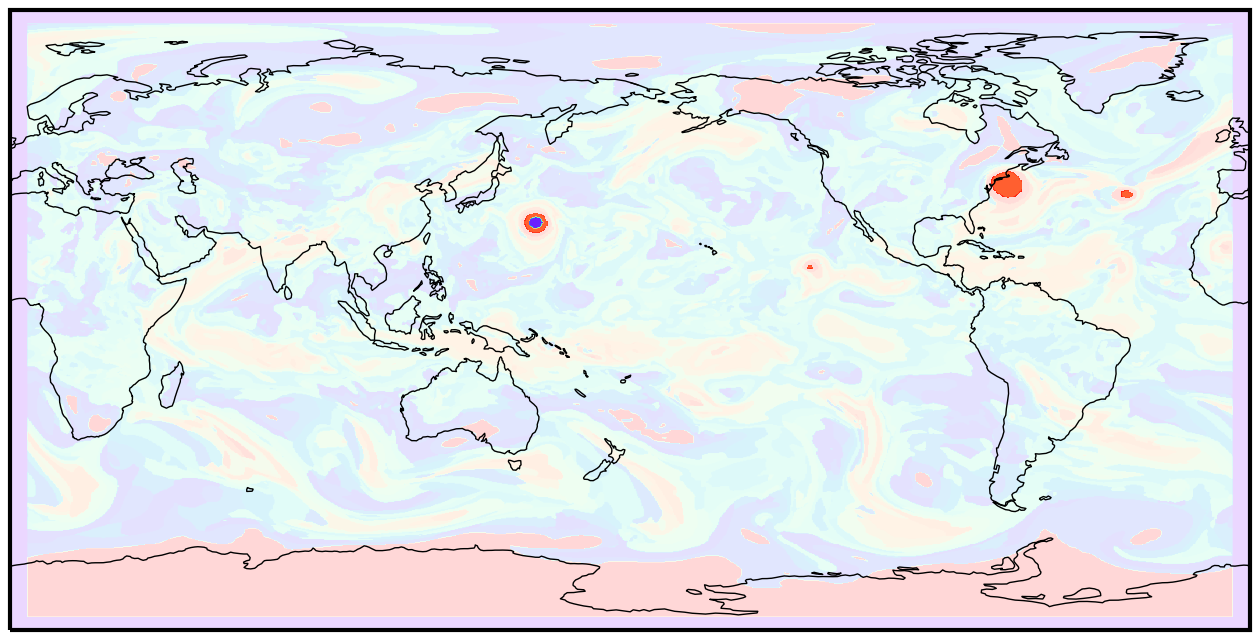

In [21]:
H,W = np.shape(field[ind])
size = 16
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(state_field[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.rainbow, origin='lower')
ax.imshow(masked, transform=ccrs.PlateCarree(), cmap=plt.cm.Greys, alpha=0.85, origin="lower")
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_masked_states-8.pdf', bbox_inches='tight')

In [22]:
maskedIVT = np.zeros(np.shape(state_field), dtype=int)
maskedIVT[state_field==21] = 1
maskedIVT[state_field==1] = 1
maskedIVT = np.ma.masked_array(maskedIVT, maskedIVT==0)

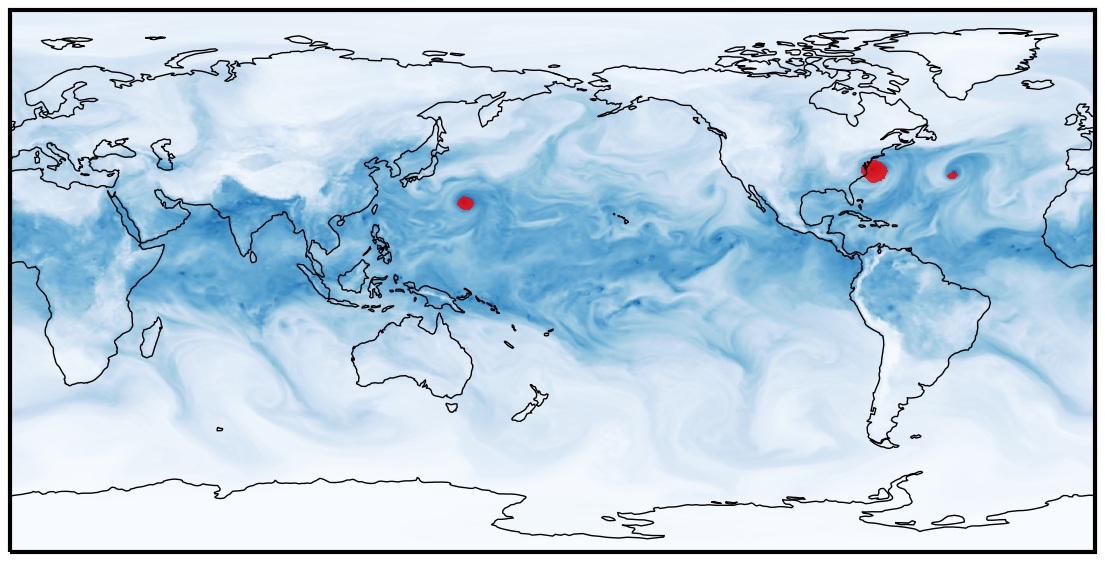

In [23]:
ind = 100

H,W = np.shape(field[ind])
size = 14
fig = plt.figure(figsize = (size, (H/W)*size))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.0))
ax.imshow(field[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.Blues, origin='lower')
ax.imshow(maskedIVT[ind], transform=ccrs.PlateCarree(), cmap=plt.cm.autumn, origin='lower', alpha=0.8)
ax.coastlines()
ax.tick_params(axis='both',
                        which='both',
                        bottom=False,
                        top=False,
                        left=False,
                        right=False,
                        labelleft=False,
                        labelbottom=False)
# plt.savefig('ivt_states_overlay-8-dark.pdf', bbox_inches='tight')